The problem we’re trying to solve here is to classify grayscale images of handwritten
digits (28 × 28 pixels) into their 10 categories (0 through 9). 

We’ll use the MNIST dataset, a classic in the machine learning community, which has been around almost
as long as the field itself and has been intensively studied. It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s.

**NOTE:** In machine learning, a category in a classification problem is called a *class*. Data points are called *samples*. The class associated with a specific sample is called a *label*.

In [17]:
from tensorflow.keras.datasets import mnist

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

The **images are encoded as NumPy arrays**, and the **labels are an array of digits, ranging from 0 to 9**. The images and labels have a one-to-one correspondence.

In [19]:
train_images.shape    # a rank-3 tensor

(60000, 28, 28)

(60000, 28, 28). So what we have here is a **rank-3 tensor** of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

In [20]:
train_labels.shape    # a vector (rank-1 tensor)

(60000,)

Let's display the fifth digit in this rank-3 tensor, using the matplotlib library.

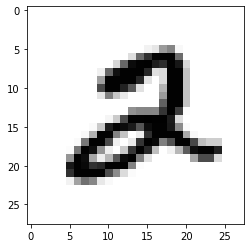

In [21]:
import matplotlib.pyplot as plt

digit = train_images[5]        # a rank-2 tensor (matrix)

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
# to confirm the digit lets us print the corresponding label from the train_labels
train_labels[5]

2

### The network architecture

In [22]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Here, our model consists of a sequence of two Dense layers, which are densely connected (also called fully connected) neural layers. 

The second (and last) layer is a **10-way softmax classification layer**, which means it will return an array of 10 probability scores
(summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

### The compilation step

To make the model ready for training, we need to pick three more things as part of the compilation step:

1. **An optimizer**—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance. 

2. **A loss function**—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

3. **Metrics to monitor during training and testing**—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [23]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values
in the [0, 255] interval. We’ll transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

### Preparing the Image data

In [24]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

We’re now ready to train the model, which in Keras is done via a call to the model’s **fit() method** — we fit the model to its training data.

### "Fitting" the model

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 14ms/step - loss: 0.2658 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.1083 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0715 - accuracy: 0.9783
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0507 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0381 - accuracy: 0.9884


Now that we have a trained model, we can use it to predict class probabilities for new digits—images that weren’t part of the training data, like those from the test set.

### Using the model to make predictions

In [26]:
test_digits = test_images[0: 10]

# predict
predictions = model.predict(test_digits)

predictions[0]       # an array of 10 probability scores for each digit

1/1 [==============================] - 0s 145ms/step


array([6.1534453e-09, 3.7731880e-09, 1.8916296e-06, 5.5976336e-05,
       1.6722498e-11, 5.4189247e-08, 1.3283242e-12, 9.9993908e-01,
       6.4121110e-08, 2.8672225e-06], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image test_digits[0] belongs to class i.

This first test digit has the highest probability score (0.99999106, almost 1) at index 7, so according to our model, it must be a 7:

In [27]:
predictions[0].argmax()

7

In [28]:
predictions[0][7]

0.9999391

In [29]:
# We can check if the test_labels agree
test_labels[0]

7

On average, how good is our model at classifying such never-before-seen digits? Let’s check by computing average accuracy over the entire test set.

### Evaluating the model on new data

In [32]:
test_loss, test_accu = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_accu}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0658 - accuracy: 0.9783
test_acc: 0.9782999753952026
